In [1]:
# import dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [7]:
#  Import and read the csv.
data_df = pd.read_csv("Resources/sample_data.csv")
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


Data Cleaning

In [6]:
# Drop the null columns where all values are null
data_df = data_df.dropna(axis='columns', how='all')
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [8]:
# Drop the null rows
data_df = data_df.dropna()
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
0,2017,1001,"Autauga County,Alabama",1,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186712,2
1,2017,1001,"Autauga County,Alabama",2,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186577,2
2,2017,1001,"Autauga County,Alabama",3,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186397,2
3,2017,1001,"Autauga County,Alabama",4,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,186839,2
4,2017,1001,"Autauga County,Alabama",5,0,27824,55448,0.951913,27041,28407,...,42606,10816,254,693,59,1020,53908,1540,187155,2


In [10]:
#Using drop() to delete rows based on column value
data_df.drop(data_df[data_df['Year'] < 2019].index, inplace = True)
data_df.head()

,Year,FIPS,C_S,month,cases,Pcincome,POPESTIMATE,MFratio,POPEST_MALE,POPEST_FEM,...,WA,BA,IA,AA,NA,TOM,NH,H,Cost,RUCC
24,2019,1001,"Autauga County,Alabama",1,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,200156,2
25,2019,1001,"Autauga County,Alabama",2,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,200999,2
26,2019,1001,"Autauga County,Alabama",3,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,201698,2
27,2019,1001,"Autauga County,Alabama",4,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,202308,2
28,2019,1001,"Autauga County,Alabama",5,0,29819,55769,0.94378,27078,28691,...,42490,11252,266,668,58,1035,54116,1653,202854,2


In [ ]:
#Using drop() to delete rows based on column value
#data_df.drop(data_df[data_df['cases'] < 1].index, inplace = True)

In [13]:
cases_cost_df = data_df[["cases","Cost"]]
cases_cost_df.head()

,cases,Cost
24,0,200156
25,0,200999
26,0,201698
27,0,202308
28,0,202854


In [15]:
# creating the scaler instance
data_scaler = StandardScaler()

# Fitting the scaler
cases_cost_scaled = data_scaler.fit_transform(cases_cost_df)

cases_cost_scaled = pd.DataFrame(cases_cost_scaled, columns=cases_cost_df.columns)
cases_cost_scaled.head()

,cases,Cost
0,-0.560116,0.521240
1,-0.560116,0.539230
2,-0.560116,0.554147
3,-0.560116,0.567165
4,-0.560116,0.578816


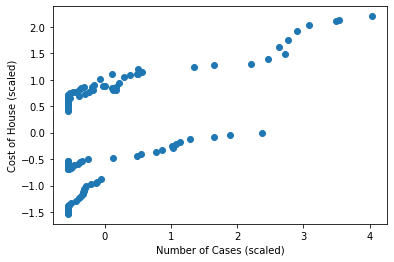

In [16]:
# comparing cases to cost SCALED
plt.scatter(cases_cost_scaled.cases, cases_cost_scaled.Cost)
plt.xlabel('Number of Cases (scaled)')
plt.ylabel('Cost of House (scaled)')
plt.show()

In [19]:
# assign the features and targets
X = cases_cost_scaled.cases.values.reshape(-1, 1)

# we assign the target variable, or the Cost column, to y
y = cases_cost_scaled.Cost

In [21]:
# create an instance of the linear regression model
model = LinearRegression()

In [22]:
model.fit(X, y)

LinearRegression()

In [23]:
# the predict() method is used to generate predictions: 
# given the number of cases, the model will predict the cost of a house:
y_pred = model.predict(X)

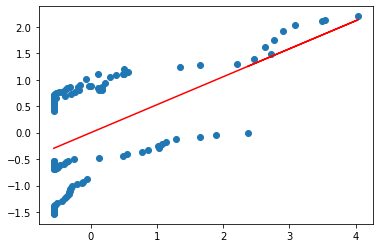

In [30]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.savefig("images/scaled_linear_regression.png")
plt.show()

In [25]:
print(model.coef_)
print(model.intercept_)

[0.52834964]
-1.2475697727974484e-16
